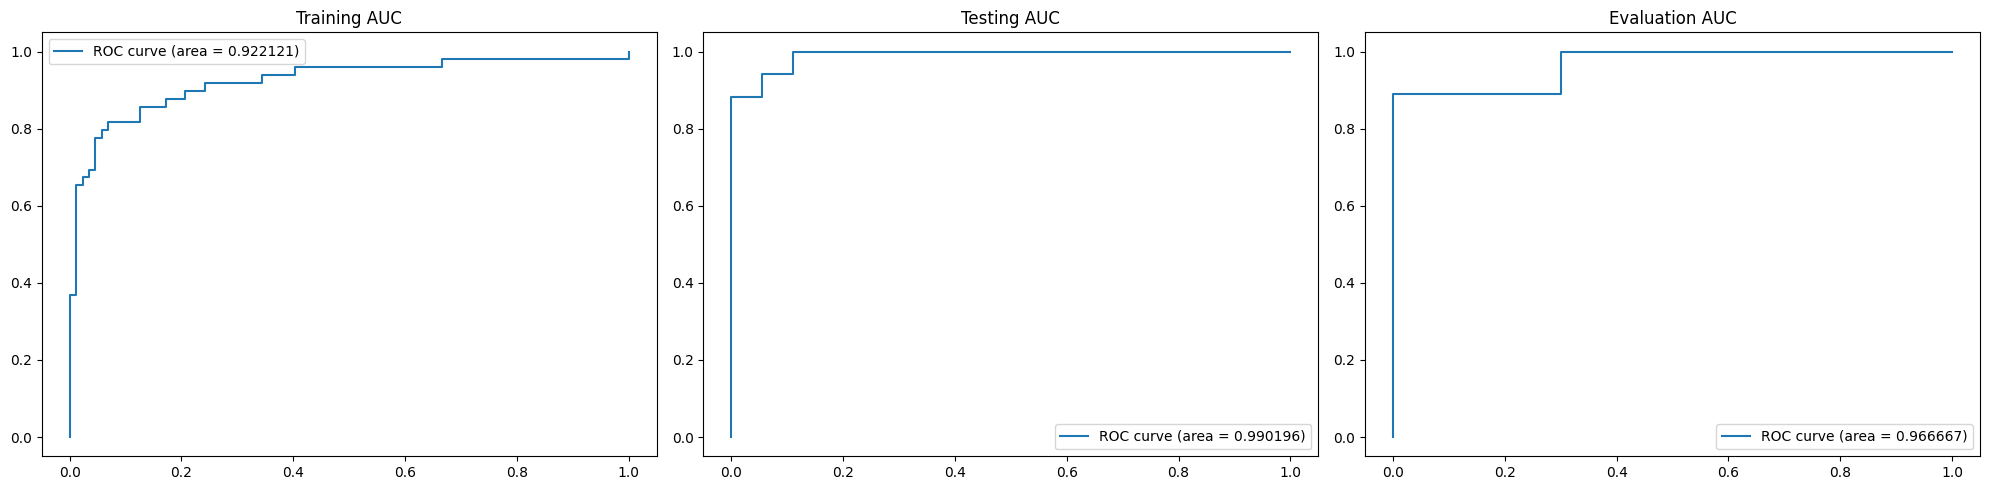

In [1]:
from sklearn.metrics import roc_auc_score, roc_curve
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5]
auc_file = Path.cwd() / "results" / "sceptr" / "eval" / "trained-sceptr-caneval-3" / "eval-set-auc-26.csv"
filedir = Path.cwd() / "results" / "sceptr" / "eval" / "trained-sceptr-caneval-3" / "Epoch 26"
traindir = filedir / "train-preds.csv"
testdir = filedir / "test-preds.csv"

data = []
fig, axs = plt.subplots(ncols = 3)

df = pd.read_csv(traindir)
fpr, tpr, threshold = roc_curve(df["actual"], df["preds"])
auc = roc_auc_score(df["actual"], df['preds'])
axs[0].plot(fpr, tpr, label = f"ROC curve (area = {auc:5f})")
axs[0].legend()
axs[0].set_title("Training AUC")
data.append(df)

df = pd.read_csv(testdir)
fpr, tpr, threshold = roc_curve(df["actual"], df["preds"])
auc = roc_auc_score(df["actual"], df['preds'])
axs[1].plot(fpr, tpr, label = f"ROC curve (area = {auc:5f})")
axs[1].legend()
axs[1].set_title("Testing AUC")
data.append(df)

df = pd.read_csv(auc_file)
fpr, tpr, threshold = roc_curve(df["actual"], df["preds"])
auc = roc_auc_score(df["actual"], df['preds'])
axs[2].plot(fpr, tpr, label = f"ROC curve (area = {auc:5f})")
axs[2].set_title("Evaluation AUC")
axs[2].legend()
data.append(df)

plt.tight_layout()
plt.show()

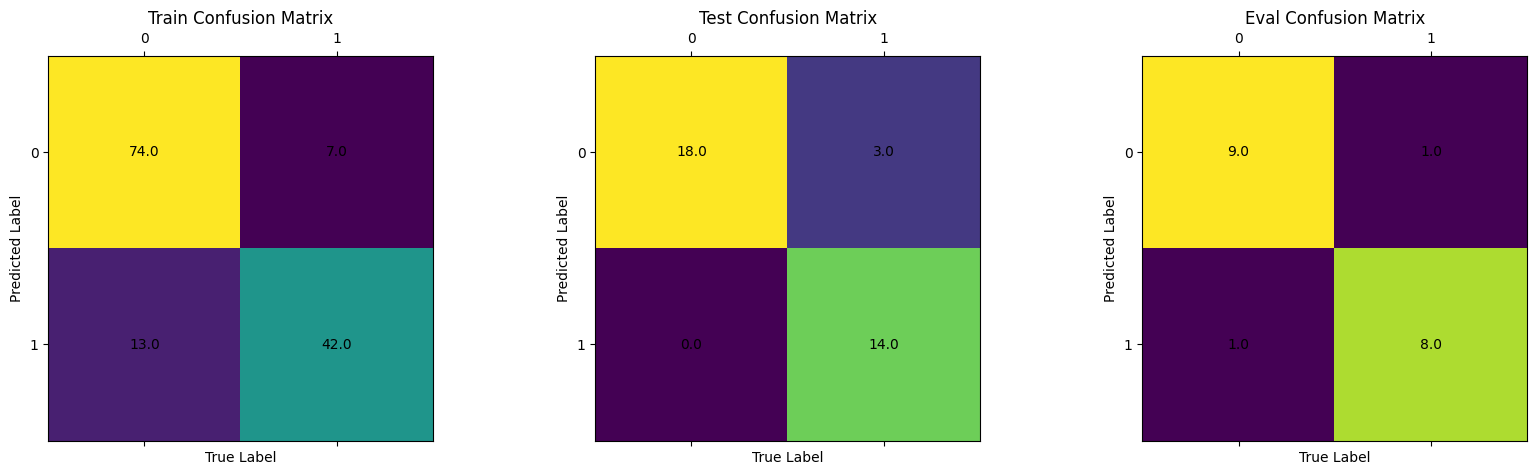

In [2]:
import numpy as np

fig, axs = plt.subplots(ncols = 3)
keys = ["Train", "Test", "Eval"]

for i, df_ in enumerate(data):
    conf = np.zeros((2, 2))
    df_["preds"] = df_["preds"].map(lambda x: 1 if x >= 0.5 else 0)
    conf[0, 0] = ((df_["preds"] == 0) & (df_["actual"] == 0)).sum()
    conf[0, 1] = ((df_["preds"] == 0) & (df_["actual"] == 1)).sum()
    conf[1, 0] = ((df_["preds"] == 1) & (df_["actual"] == 0)).sum()
    conf[1, 1] = ((df_["preds"] == 1) & (df_["actual"] == 1)).sum()
    axs[i].matshow(conf)

    for x in range(2):
        for y in range(2):
            axs[i].text(x, y, str(conf[y, x]), va = "center", ha = "center")
    
    axs[i].set_xlabel("True Label")
    axs[i].set_ylabel("Predicted Label")
    axs[i].set_title(f"{keys[i]} Confusion Matrix")